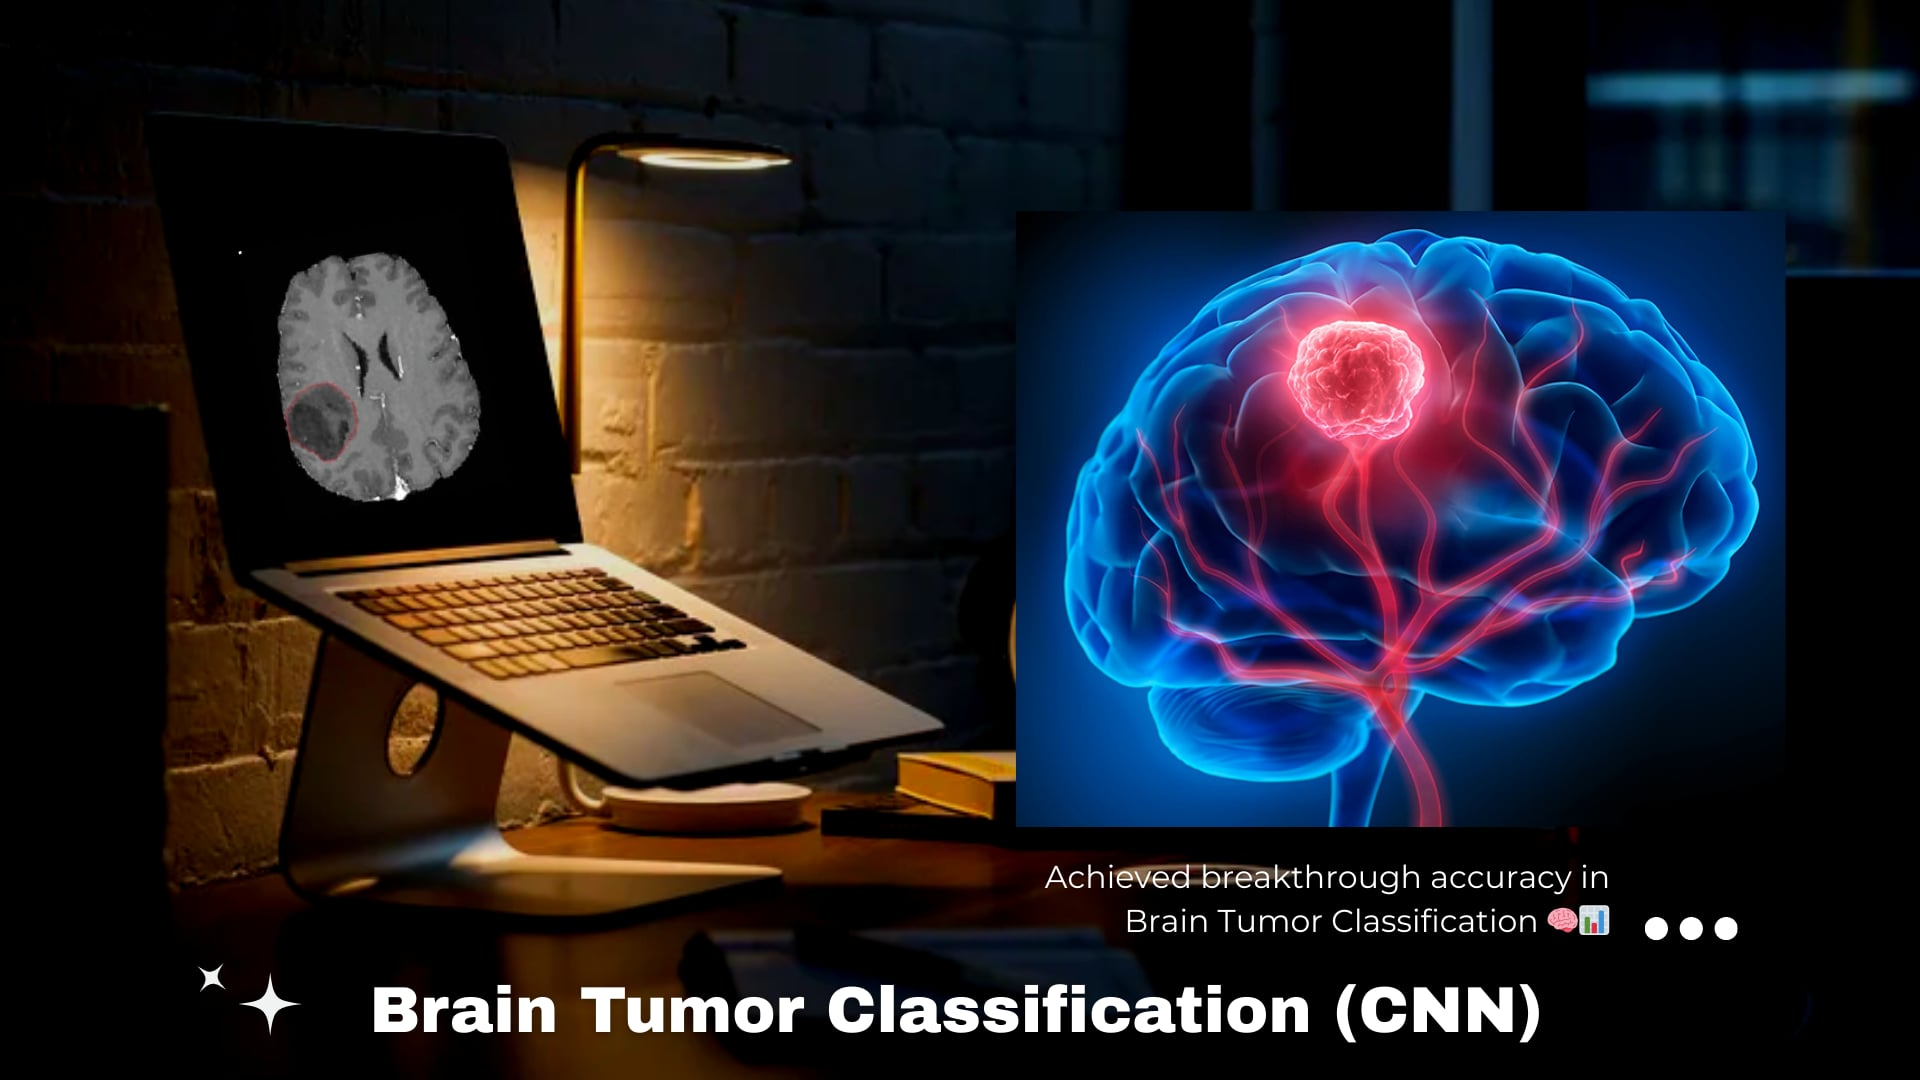

#  Brain Tumor Classification with CNN 
Accurate **brain tumor detection** is critical for early diagnosis and treatment planning. In this project, we use Convolutional Neural Networks (CNNs) to classify brain MRI images into four categories: **Glioma**, **Meningioma**, **Pituitary**, and **No Tumor**.

**CNNs** are well-suited for medical imaging tasks due to their ability to automatically extract spatial features and patterns. This notebook demonstrates a deep learning pipeline for brain tumor classification, including data preprocessing, model training, evaluation, and visual interpretation.



<h1 style="color:white; background-color:green; font-size:30px; padding:10px; border-radius:10px; text-align:center; width:100%;">🗂️ Dataset Overview </h1>

🧠 Brain Tumor Classification with CNN
📂 Dataset Link: /kaggle/input/brain-tumor-classification-mri

This notebook covers data preprocessing, CNN model building, training, and performance evaluation using metrics and visualizations.
The dataset contains labeled MRI images classified into tumor types such as:


1.Glioma
2.Meningioma
3.Pituitary
4.No Tumor

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass # Keeping loop valid without printing

In [2]:
#Importing Libraries We import essential modules from Keras to build the CNN model, and sklearn for evaluating accuracy.
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

2025-05-09 10:57:58.959223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746788279.140653      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746788279.196114      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import ipywidgets as widgets  # For interactive widgets (optional UI elements)
import io  # For handling byte streams (image loading)
from PIL import Image  # To open and process image files
import tqdm  # For displaying progress bars
from sklearn.model_selection import train_test_split  # To split dataset into training and testing sets
import cv2  # OpenCV for image processing (resizing, reading, etc.)
from sklearn.utils import shuffle  # To shuffle dataset randomly
import tensorflow as tf  # Main deep learning framework



<h1 style="color:white; background-color:green; font-size:30px; padding:10px; border-radius:10px; text-align:center; width:100%;">Brain Tumor Classification Data Preprocessing </h1>

In [4]:
import cv2
import numpy as np
import os

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Load training images
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))  # Read image
        img = cv2.resize(img, (image_size, image_size))  # Resize to 150x150
        X_train.append(img)
        Y_train.append(i)  # Append label

# Load testing images
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [5]:

from sklearn.utils import shuffle

# Shuffle the image data and labels together to randomize input order
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Print the shape of the image dataset
print(X_train.shape)


(3264, 150, 150, 3)


🧹 Label Alignment
We ensure that Y_train has the same length as X_train, in case of any mismatch during data loading.

In [6]:
# Ensure labels match the number of images (in case of mismatch)
Y_train = Y_train[:X_train.shape[0]]


<h1 style="color:white; background-color:green; font-size:30px; padding:10px; border-radius:10px; text-align:center; width:100%;">Train test split </h1>
We split the dataset into training and testing sets to evaluate model performance on unseen data. Typically, 80-20 or 70-30 splits are used.

In [7]:
# Split the dataset into 90% training and 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Check the shape of the train and test sets
print(X_train.shape, X_test.shape)

(2937, 150, 150, 3) (327, 150, 150, 3)


In [8]:
# Convert labels to list if they are numpy arrays
y_train = y_train.tolist() if isinstance(y_train, np.ndarray) else y_train
y_test = y_test.tolist() if isinstance(y_test, np.ndarray) else y_test

# Convert string labels into integer indices for training
y_train_new = []
for i in y_train:
    if i in labels:
        y_train_new.append(labels.index(i))  # Find index of the label
    else:
        y_train_new.append(-1)  # Handle unexpected labels
y_train = np.array(y_train_new)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))  # Apply one-hot encoding

# Repeat for test labels
y_test_new = []
for i in y_test:
    if i in labels:
        y_test_new.append(labels.index(i))
    else:
        y_test_new.append(-1)
y_test = np.array(y_test_new)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))


<h1 style="color:white; background-color:green; font-size:30px; padding:10px; border-radius:10px; text-align:center; width:100%;"> Convolutional Neural Networks (CNN) </h1>

🧠 Convolutional Neural Networks (CNN)
CNNs are a type of deep learning model designed for image data. They automatically extract spatial features from images using convolutional layers, pooling, and activation functions — making them ideal for medical image classification tasks like brain tumor detection.

In this section, we build a CNN architecture to classify MRI images into four tumor categories.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746788314.921545      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


🏗️ # CNN Model Architecture
We build a deep Convolutional Neural Network using the Sequential API from TensorFlow Keras. The architecture consists of:

Multiple Conv2D layers with ReLU activation to extract spatial features

MaxPooling2D layers to reduce dimensionality and computation

Dropout layers to prevent overfitting

Flatten to convert feature maps into a 1D vector

Fully connected Dense layers for classification

A final Dense layer with softmax activation for multi-class output (4 classes)

This deep architecture enables the model to learn complex patterns in brain MRI scans for accurate tumor classification.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 70, 70, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,283,716 (4.90 MB)

 Trainable params: 1,283,716 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:


print(X_train.shape)  # (2611, 150, 150, 3)
print(y_train.shape)  # (2611,)

(2937, 150, 150, 3)
(2937, 4)


🏋️ Model Training
Now we compile and train the CNN model using the training data. We'll monitor performance over multiple epochs to ensure the model is learning effectively, and use validation data to track generalization on unseen images.

<h1 style="color:white; background-color:green; font-size:30px; padding:10px; border-radius:10px; text-align:center; width:100%;"> Train Model </h1>


In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50


I0000 00:00:1746788321.374871      60 service.cc:148] XLA service 0x7d0a18026ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746788321.375689      60 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746788321.935982      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


 7/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2574 - loss: 7.3598

I0000 00:00:1746788329.032611      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 127ms/step - accuracy: 0.2980 - loss: 2.6068 - val_accuracy: 0.4762 - val_loss: 1.2952
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4405 - loss: 1.2529 - val_accuracy: 0.4524 - val_loss: 1.2121
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5008 - loss: 1.1577 - val_accuracy: 0.5340 - val_loss: 1.1412
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5006 - loss: 1.1121 - val_accuracy: 0.5136 - val_loss: 1.0837
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5558 - loss: 1.0126 - val_accuracy: 0.5238 - val_loss: 1.0142
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6166 - loss: 0.9312 - val_accuracy: 0.6054 - val_loss: 0.9547
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6657 - loss: 0.8385 - val_accuracy: 0.6463 - val_loss: 0.9152
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6732 - loss: 0.7749 - val_accuracy: 0.6735 - val_loss: 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 

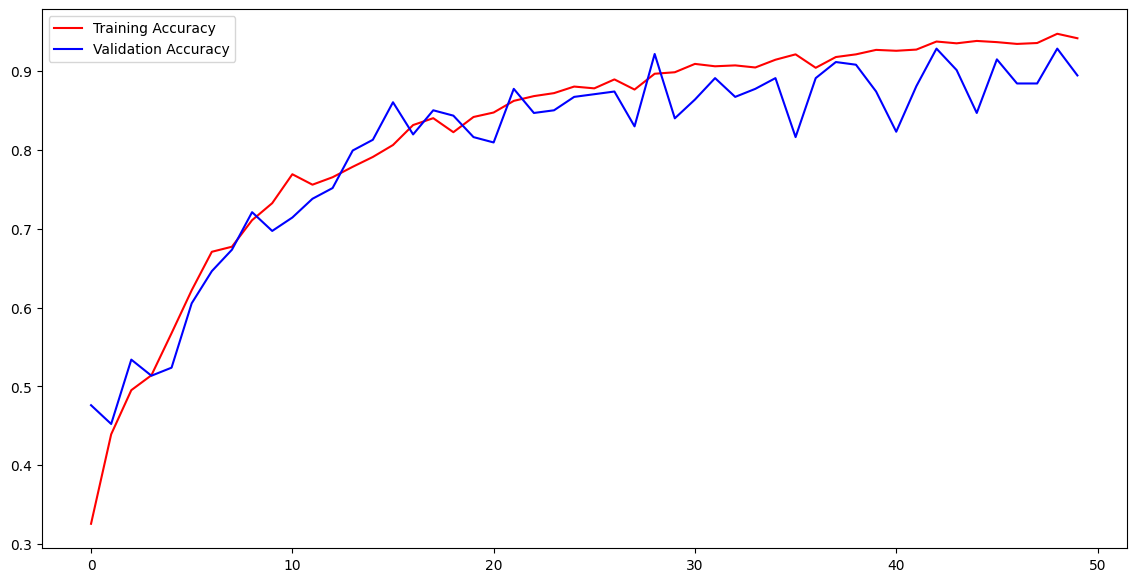

In [15]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

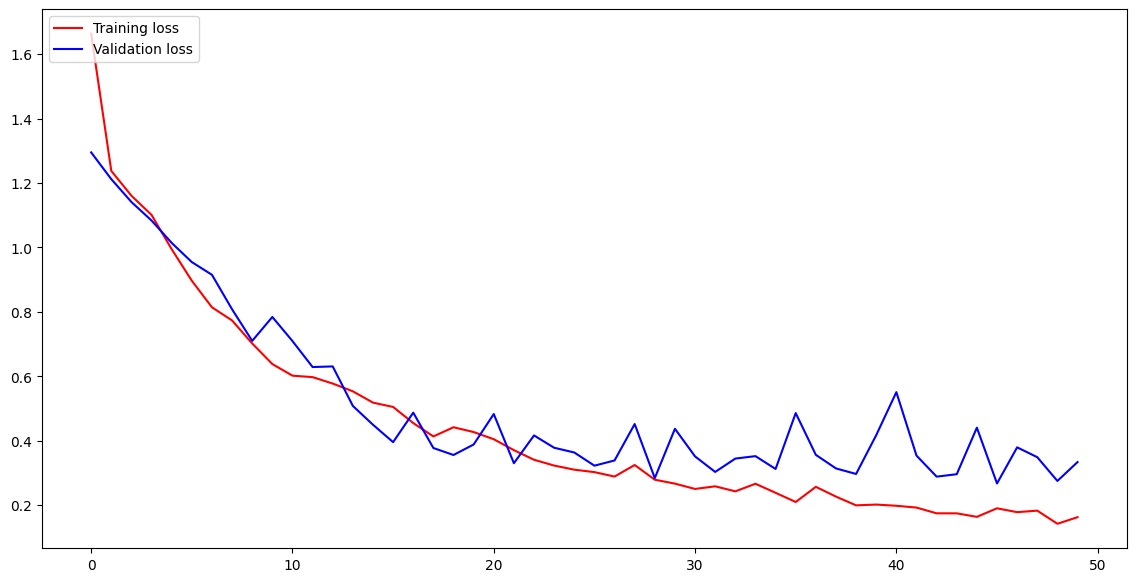

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.show()

<h1 style="color:white; background-color:green; font-size:30px; padding:10px; border-radius:10px; text-align:center; width:100%;"> Confusion Matrix </h1>


# Confusion matrix

A confusion matrix is a tool that helps to evaluate the performance of a model, particularly for classification problems. It compares the actual and predicted labels, and generates a table that summarizes the correct and incorrect predictions.

Here is an example of a basic confusion matrix:
|                          | **Predicted Positive**  | **Predicted Negative**  |
|--------------------------|-------------------------|-------------------------|
| **Actual Positive**      | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative**      | False Positive (FP)     | True Negative (TN)      |

---

### Explanation:

- **True Positive (TP):** The model correctly predicted the positive class.
- **True Negative (TN):** The model correctly predicted the negative class.
- **False Positive (FP):** The model incorrectly predicted the positive class.
- **False Negative (FN):** The model incorrectly predicted the negative class.


.
Using the confusion matrix, you can calculate various performance metrics like accuracy, precision, recall, F1-score, etc.

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


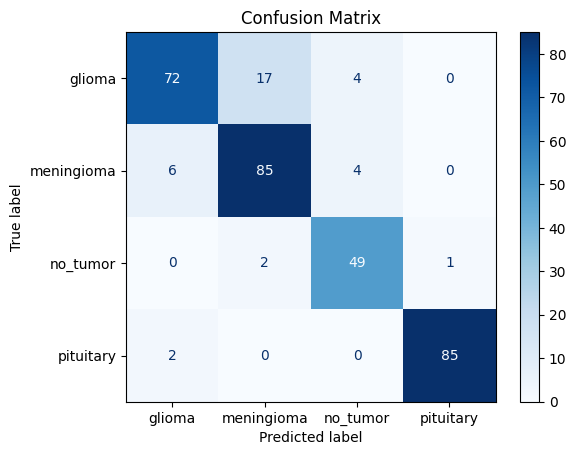

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict on X_test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True values
y_true = np.argmax(y_test, axis=1)  # y_test used here, not Y_test

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Class names
class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [18]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (100).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [19]:
img_array = img_array .reshape (1,150,150,3)
img_array.shape

(1, 150, 150, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

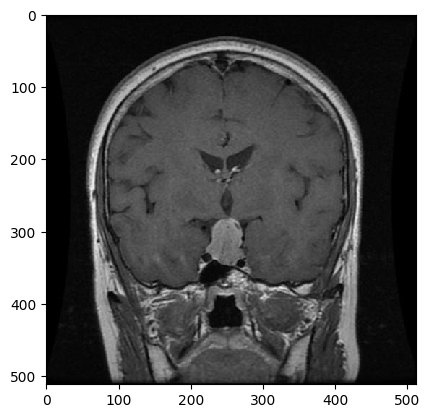

In [20]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (100).jpg')
plt.imshow (img,interpolation ='nearest')
plt.show

In [21]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


3

<h1 style="color:white; background-color:green; font-size:30px; padding:10px; border-radius:10px; text-align:center; width:100%;"> Thank You </h1>
